In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from KMeans import KMeans

%matplotlib inline

In [2]:
# FILE = "dandelion.jpg"
# FILE = "beach.jpg"
# FILE = "bird.jpg"
FILE = "flowers.jpg"
# FILE = "sunrise.jpg"
# FILE = "rose.jpg"
with Image.open(FILE) as im:
    im.load()

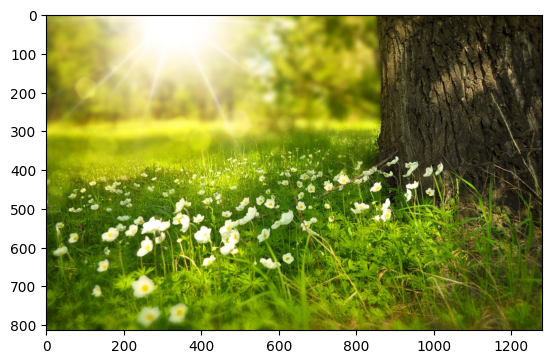

In [3]:
im = np.asarray(im)
orig_shape = im.shape
plt.imshow(im)

In [4]:
Image.fromarray(im.astype(np.uint8)).save(FILE+".png")
# Image.fromarray(im.astype(np.uint8)).save(FILE+".jpg")

im = im / 255.
im_flat = np.reshape(im, (im.shape[0] * im.shape[1] , im.shape[2]))

(1041920, 3)

In [15]:
model = KMeans(im_flat, 12, 10, 10)

In [16]:
# (centroids, centroid_idx), it, rnd = model.start(25)
centroids, centroid_idx, _ = model.optimize()

K-means Iteration: 1, Iteration: 1 Current Distortion: 0.0948932870295374
K-means Iteration: 1, Iteration: 2 Current Distortion: 0.08780842821855092
K-means Iteration: 1, Iteration: 3 Current Distortion: 0.08543362197775263
K-means Iteration: 1, Iteration: 4 Current Distortion: 0.08431952967398569
K-means Iteration: 1, Iteration: 5 Current Distortion: 0.08365147919375222
K-means Iteration: 1, Iteration: 6 Current Distortion: 0.08316140093664301
K-means Iteration: 1, Iteration: 7 Current Distortion: 0.08269455328570302
K-means Iteration: 1, Iteration: 8 Current Distortion: 0.0820293859391722
K-means Iteration: 1, Iteration: 9 Current Distortion: 0.08116063210073689
K-means Iteration: 1, Iteration: 10 Current Distortion: 0.08054118499281775
K-means Iteration: 1, Distortion: 0.08054118499281775, Best: (1, 0.08054118499281775)

K-means Iteration: 2, Iteration: 1 Current Distortion: 0.12505722637007777
K-means Iteration: 2, Iteration: 2 Current Distortion: 0.10533079659871288
K-means Iterat

In [17]:
X_recovered = centroids[centroid_idx, :]
X_recovered = X_recovered * 255
X_recovered = np.reshape(X_recovered, orig_shape)
# X_recovered.shape

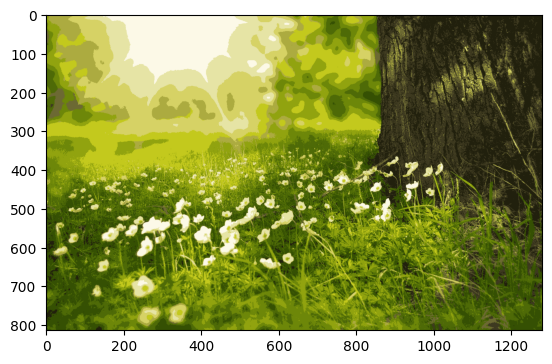

In [18]:
i = Image.fromarray(X_recovered.astype(np.uint8))
plt.imshow(i)

In [19]:
i.save("lol.png")